# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.cross_validation import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

split_procents = 0.9
n_test = test['features'].shape[0]
split = (int(split_procents*n_test))

    
X_in, y_in = train['features'], train['labels']
X_validation, y_validation = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_in, y_in, test_size=0.2, random_state=42)


/home/td/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# TODO: Number of training examples
n_train = X_train.shape[0]
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]


# TODO: What's the shape of an traffic sign image?
image_shape = str(X_train.shape[1]) +"x" + str(X_train.shape[2]) +"x"+ str(train['features'].shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Number of validation examples = 7842
Image data shape = 32x32x3
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
names = [
"Speed limit (20km/h)",
"Speed limit (30km/h)",
"Speed limit (50km/h)",
"Speed limit (60km/h)",
"Speed limit (70km/h)",
"Speed limit (80km/h)",
"End of speed limit (80km/h)",
"Speed limit (100km/h)",
"Speed limit (120km/h)",
"No passing",
"No passing for vehicles over 3.5 metric tons",
"Right-of-way at the next intersection",
"Priority road",
"Yield",
"Stop",
"No vehicles",
"Vehicles over 3.5 metric tons prohibited",
"No entry",
"General caution",
"Dangerous curve to the left",
"Dangerous curve to the right",
"Double curve",
"Bumpy road",
"Slippery road",
"Road narrows on the right",
"Road work",
"Traffic signals",
"Pedestrians",
"Children crossing",
"Bicycles crossing",
"Beware of ice/snow",
"Wild animals crossing",
"End of all speed and passing limits",
"Turn right ahead",
"Turn left ahead",
"Ahead only",
"Go straight or right",
"Go straight or left",
"Keep right",
"Keep left",
"Roundabout mandatory",
"End of no passing",
"End of no passing by vehicles over 3.5 metric tons"
]

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np
import random


#combine the set of labels
images = []  #{id,'<image>, name,random_idx,count}

fig = plt.figure()


idx = 0
for idx in range(n_classes):
    
    
    idx_examples = np.where(y_train == idx)
    #print(idx_examples)
    count = len(idx_examples[0])
    #print(count)
    image =  X_train[random.choice(idx_examples[0])].squeeze()
    #print(idx,names[idx],count )
    name = names[idx]
    

    line = [idx,image,name,count]
    images.append(line)
    


    




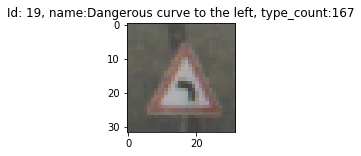

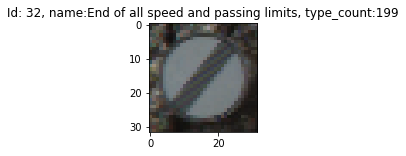

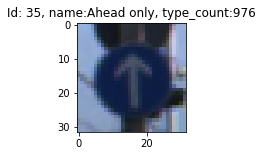

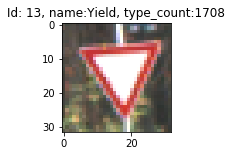

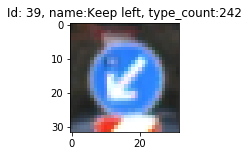

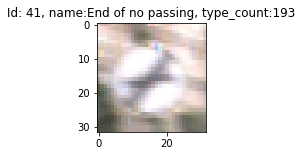

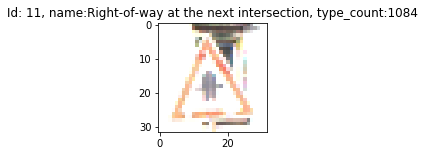

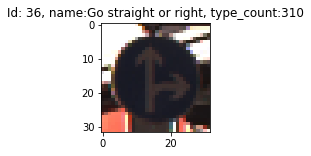

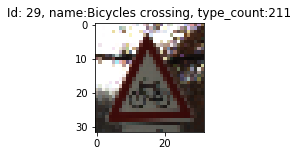

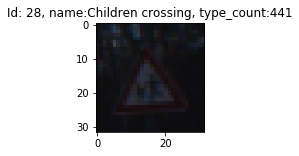

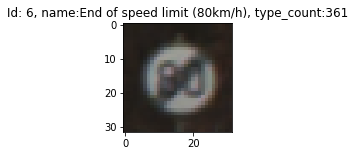

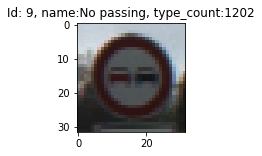

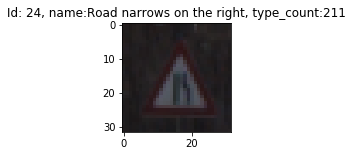

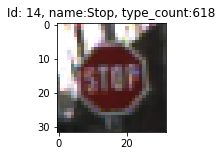

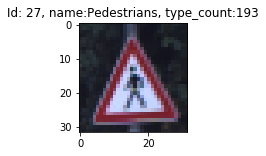

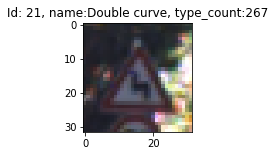

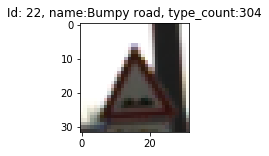

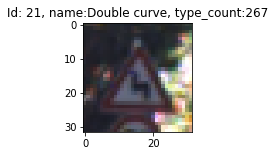

In [5]:
#show random 20 images with some stats


    
for x in range(1,19):
    #print(idx)
    idx = random.randint(1,n_classes)
    
    plt.figure(figsize=(2,2))
    
    plt.title("Id: {}, name:{}, type_count:{}".format(idx,images[idx][2],images[idx][3]))
    imgplot = plt.imshow(images[idx][1])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

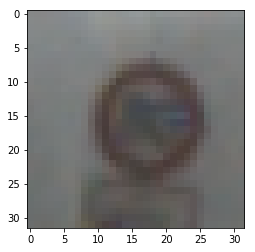

In [7]:
import tensorflow as tf
#Preprocess image


### Playing with filters ####
id = 5467
image = X_train[id]

imgplot = plt.imshow(image.squeeze())

plt.show()

#gray_image = tf.image.grayscale_to_rgb(image, name=None)

#imgplot = plt.imshow(gray_image,cmap='Greys_r')


#normalized = cv2.normalize(gray_image,0,255,cv2.CV_8UC1)

#imgplot = plt.imshow(normalized.squeeze(),cmap='Greys_r')

#print(normalized.shape)




In [9]:
### Restructure input data

def Preprocessor(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.normalize(image,0,255)
    return image

print(X_train.shape)
#X_train_p = [] 
     
#arr = np.zeros((n_train, 32, 32, 1))


idx = 0
for img in X_train:
    im = Preprocessor(img)
    #arr[idx, :, :, 1] = im
    #X_train_p.append(Preprocessor(img))

#X_train_p  = np.asarray(X_train_p)
#print (X_train[1])
#print (X_train_p[1])

(31367, 32, 32, 3)


In [44]:
#Nural Network deeply "inspired" by previous LaNet Exercise modified some depths
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x36.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 36), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(36))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x36. Output = 900.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 900. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(900, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 184.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 184), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(184))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 184. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(184, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



In [45]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [46]:
rate = 0.001

logits = LeNet(x)


In [47]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [48]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [56]:
EPOCHS = 15
BATCH_SIZE = 200


In [50]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [57]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)

    print("Training...")
    import time
    tic = time.clock()
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    print("Session time {}".format(time.clock() - tic))
        
    save_path = saver.save(sess, "model1.ckpt")
    print("Model saved in file: %s" % save_path)

Training...

EPOCH 1 ...
Validation Accuracy = 0.495

EPOCH 2 ...
Validation Accuracy = 0.735

EPOCH 3 ...
Validation Accuracy = 0.824

EPOCH 4 ...
Validation Accuracy = 0.869

EPOCH 5 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.921

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.945

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.950

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.951

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.949

EPOCH 15 ...
Validation Accuracy = 0.960

Session time 20.451347999999996
Model saved in file: model1.ckpt


In [58]:
with tf.Session() as sess:
    saver.restore(sess, "model1.ckpt")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.867


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

"""

To not reinvent the whell i used openCV

a) make images monocolor, as there are people that don't distinguiss between red and green our AI also don't have to. And it is alway 3 time less data to process
b) make images normalized. As our eyes pupil shrink to avoid to much light or grow to get more light to get best contrast available. We can also do that with our image


TO DO: Actually didn't preprocessed finally in OpenCV. Had some ubuntu cv2 issues, so finally skipped that step, for sure in next projects i will use both (tensorflow-gpu and opencv2)

"""

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
"""
Added validation set using 

from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_in, y_in, test_size=0.2, random_state=42)

I wanted to generate some of the blurs, or brightness changes, 
but i've looked on the test images and they have 
been already changed a little with openCV so adding another images that look the same could imho decrease learnig accuracy


"""

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
"""
I have used LaNet Architecture, as it was working fine, maybe not perfect but as exercise - "good enough"
I Have sized up depth of 2nd Convonutional layer becuse 
in my intuition we have more "features" of high level in road signs 


"""

   
    # 1 -  Layer 1: Convolutional. Input (image)= 32x32x3. Output = 28x28x6.
    # 2 -  Activation ReLu
    # 3 - Pooling. Input = 28x28x6. Output = 14x14x6.
    # 4 - Layer 2: Convolutional. Output = 10x10x36.
    # 5 -Activation. ReLU
    # 6 - Pooling. Input = 10x10x36. Output = 5x5x36.
    # 7 - Flatten. Input = 5x5x36. Output = 900.
    # 8 - Layer 3: Fully Connected. Input = 900. Output = 120.
    # 9 - Activation
    # 10 - Layer 4: Fully Connected. Input = 120. Output = 184.
    # 11 - Activation ReLU
    # 12 -  Layer 5: Fully Connected. Input = 184. Output = 43(Classifier).
   

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
As just started with NN i find it challanging enough to understand LaNet structure and applying it to Tensorflow by my own. My aproch was to use previous experiences with lanet and apply it to this project. 

LaNet was design to classification hand written letters. Our problem seems similar in many dimensions. First of all we classify images. Also number of images to classify is very similar. Also in road signs we have numbers.

What was not in MINST data set it was a lot of disortion of blurs, light conditions, gemotry disortions (POV)

Also now i understand that key is MORE more more and more data



My accuracy was 86% on testing data set. A lot of things could be improved:
--Adding more fancy imagepreprocessor,
--Generating mor disorted images data
--Getting More Data
--Playing more with LaNet parameters
--Increase resolution of images




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [53]:
from scipy import misc

own_images = []

own_images.append(misc.imread('own/1.jpg'))
own_images.append(misc.imread('own/2.jpg'))
own_images.append(misc.imread('own/3.jpg'))
own_images.append(misc.imread('own/4.jpg'))
own_images.append(misc.imread('own/5.jpg'))


###Covert ndarrays to tensorflow style
X_own = np.asarray(own_images)
y_own = np.asarray([14,14,5,12,29])
print (X_own.shape)





(5, 32, 32, 3)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



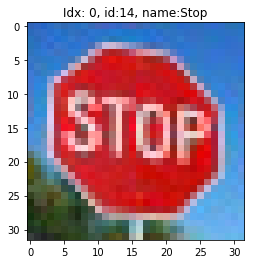

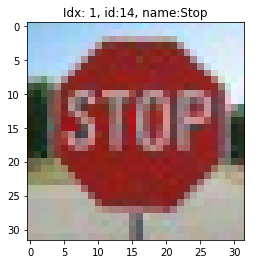

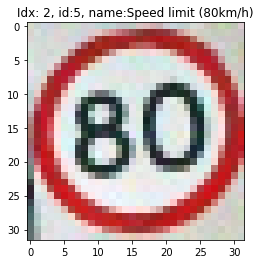

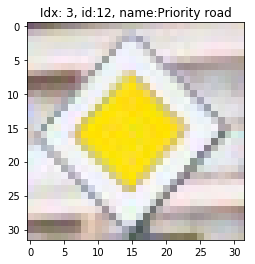

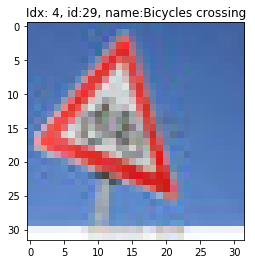

--


In [54]:
###my candidates
"""
I have created images that are quite good quality. So Images are brighr, no blur, good contrast.  
So in theory there should be no issues with these images. Last one "bicycles crossing" have strongly disorted geometry,
also sign is very small and bluury. Even as a human is hard to find out what it is
"""
#print(image)
for i in range(len(own_images)):
    imgplot = plt.imshow(X_own[i].squeeze())
    plt.title("Idx: {}, id:{}, name:{}".format(i,y_own[i],names[y_own[i]]))
    plt.show()
print("--")
#print(X_train[1])

**Answer:**

In [61]:
with tf.Session() as sess:
    saver.restore(sess, "model1.ckpt")
    hi = sess.run(accuracy_operation, feed_dict={x: X_own, y: y_own})
    print(hi)

0.6


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
"""
To test data accuracy we can use this brilliant function delivered by udcity in lanet example and feading data exactly 
same way My accuracy is 60% so 2 signs were unresolved

with tf.Session() as sess:
    saver.restore(sess, "model1.ckpt")

    test_accuracy = evaluate(X_own, y_own)
    print("Test Accuracy = {:.3f}".format(test_accuracy))





Difference is huge 60% vs 87%, I believe it is because of slighty different signs shape, colours, these images are simply different. 
Maybe we need deeper NN or.... MORE DATA!

Also 5 images data set is really not represntative (statisc drama - to small amount of testing group)

"""


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

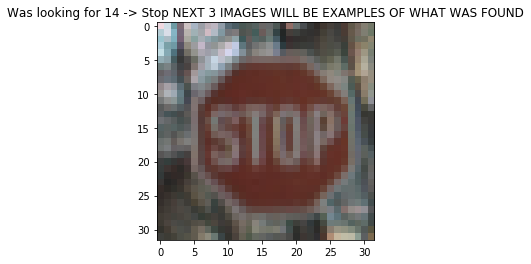

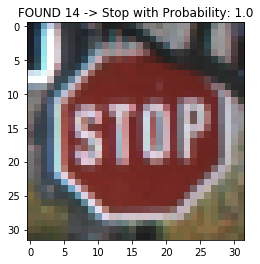

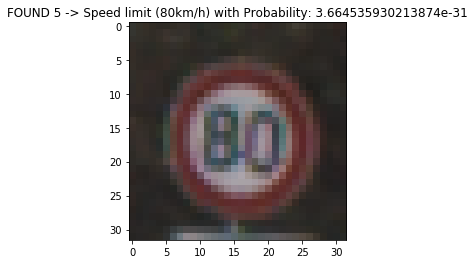

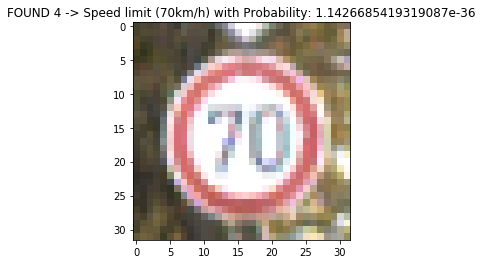

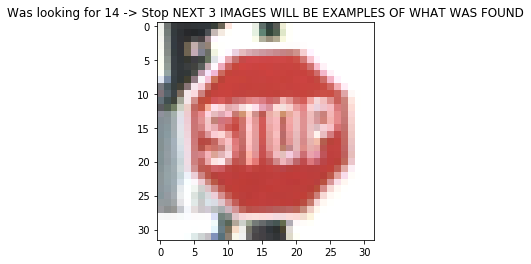

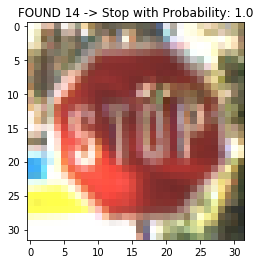

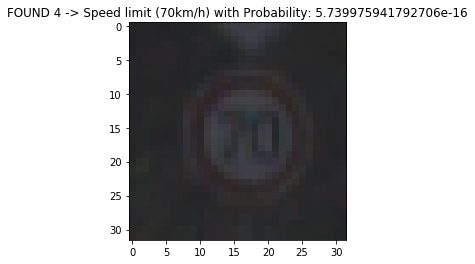

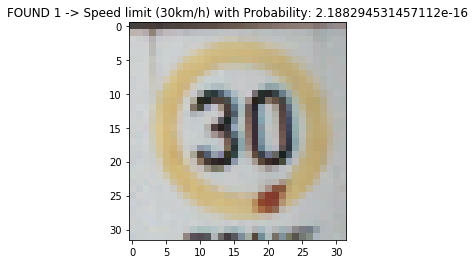

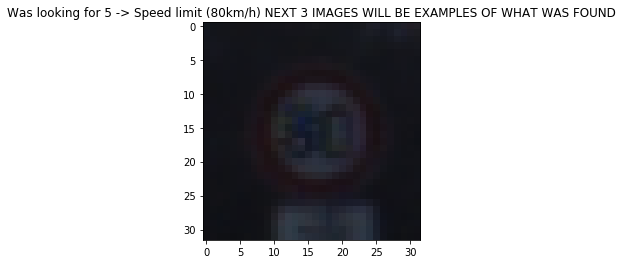

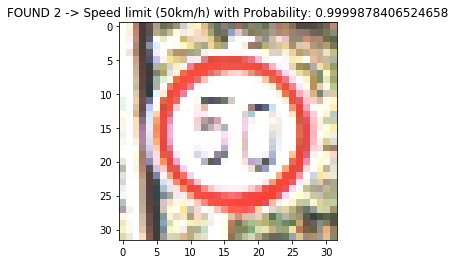

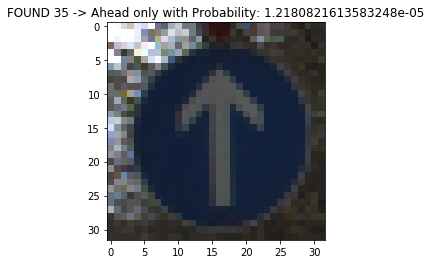

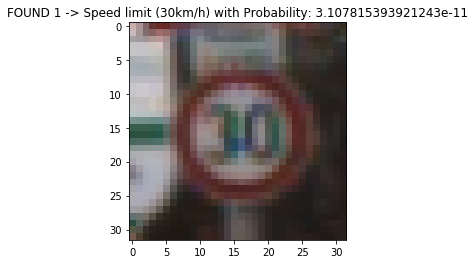

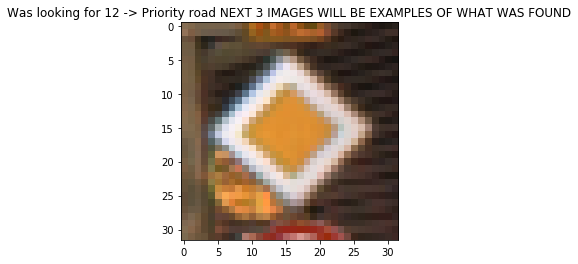

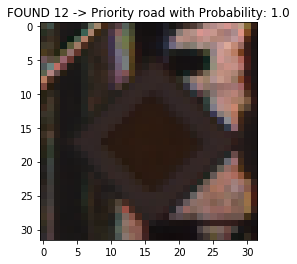

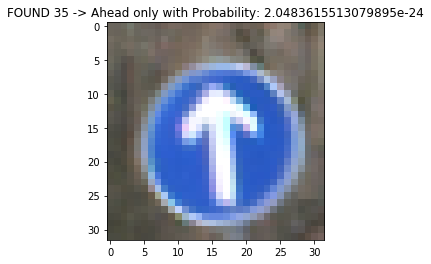

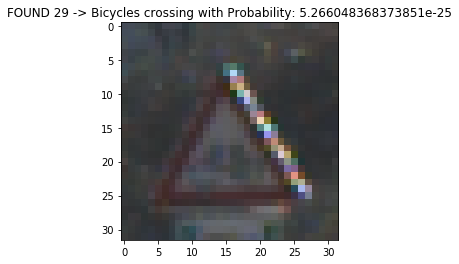

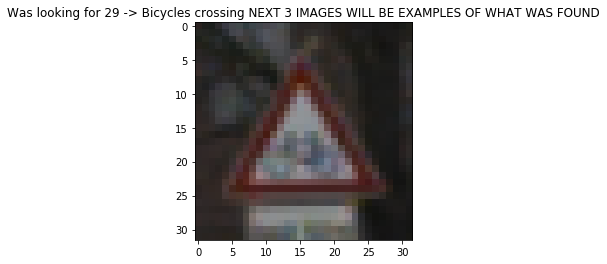

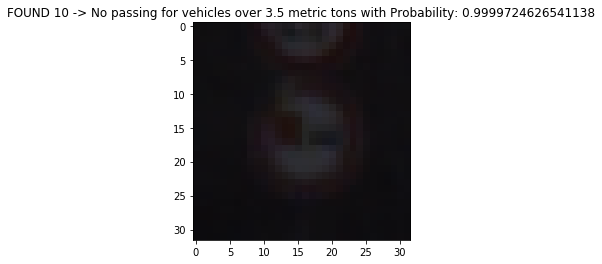

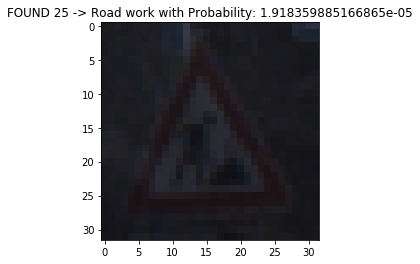

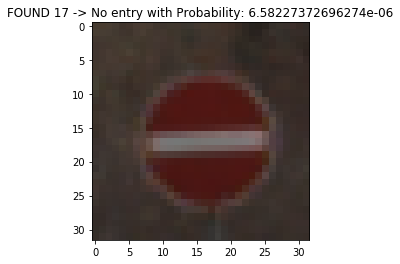

In [120]:
#Generate cool visualisation to show what we were looking for and what we found (with what probability)
predictSoftmax = tf.nn.softmax(logits)
probs = None

with tf.Session() as sess:
    saver.restore(sess, "model1.ckpt")
    softmaxProb = sess.run(predictSoftmax, feed_dict={x: X_own})
    dramat = tf.nn.top_k(softmaxProb, 3)
    probs = (sess.run(dramat))
    

#print(probs)

correct = [14,14,5,12,29]
vals = probs[0]
predicted = probs[1]


for idx in range(len(y_own)):
    plt.title("Was looking for {} -> {} NEXT 3 IMAGES WILL BE EXAMPLES OF WHAT WAS FOUND".format(y_own[idx],names[y_own[idx]]))
    img_examples = np.where(y_train == y_own[idx])
    image =  X_train[random.choice(img_examples[0])].squeeze()
    imgplot = plt.imshow(image)
    plt.show()
    
    for i in range(3):
        found_y = predicted[idx][i]
        probab = vals[idx][i]
        plt.title("FOUND {} -> {} with Probability: {}".format(found_y,names[found_y],probab))
        img_examples = np.where(y_train == found_y)
        image =  X_train[random.choice(img_examples[0])].squeeze()
        imgplot = plt.imshow(image)
        plt.show()
    
    
    
    




    
    

    


**Answer:**
AS we see, accuracy could be 80%, Stop signs - PERFECT!  
We found speed limit 80 as speed limit 50. Numbers with this resolution are realyy hard

But with last image (bicycles) We were not even close


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.